<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/12_naive_bayes/2_naive_bayes_theorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

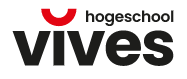<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# **TOPIC 11: NAIVE BAYES - THEORIE**

## **1. Kansrekening**

Zie cursus Data Analysis

### Kansen volgens Laplace

- **kansexperiment**: afgelijnd experiment dat een onbeperkt aantal keren kan herhaald worden onder gelijkblijvende omstandigheden
- **uitkomstenruimte** of universum U: de verzameling van alle mogelijk uitkomsten van zo'n kansexperiment
- **gebeurtenis** G: een deelverzameling van U, dus $G \subset U$
- P(G) = **kans** op gebeurtenis G: aantal gunstige uitkomsten gedeeld door aantal mogelijke uitkomsten of:
> **P(G) = #G / #U**   
(# staat voor "aantal elementen in verzameling...")
- de kans ligt tussen 0 en 1, grenzen inbegrepen:
  - de onmogelijke gebeurtenis heeft kans 0
  - de zekere gebeurtenis P(U) heeft kans 1

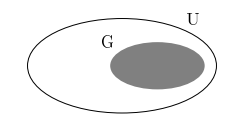

Voorbeeld:
- zak met 50 knikkers:
  - 30 rode knikkers
  - 20 groene knikkers
- gebeurtenis G: rode knikker trekken
  - 30 gunstige uitkomsten: #G = 30
  - 50 mogelijke uitkomsten: #U = 50
  - P(G) = #G / #U = 30 / 50 = 0.6

### Kansen als relatieve frequentie

**Experimentele wet van de grote aantallen**
- kansexperiment oneindig aantal keer herhalen: relatieve frequentie f(G) van gebeurtenis G = kans P(G) op gebeurtenis G
- relatieve frequentie f(G) = aantal keren dat G voorkomt gedeeld door aantal keren dat experiment wordt uitgevoerd
- kansexperiment een eindig aantal keer herhalen: f(G) benadert P(G)
- hoe meer we herhalen, hoe beter P(G) wordt benaderd door f(G)


In [ ]:
from random import shuffle, choice, seed

# random seed
seed(2020)  # seed van random generator definiëren zorgt dat we altijd dezelfde uitkomst krijgen

# zak met 30 rode en 20 groene knikkers
knikkers = ["rood" for _ in range(30)] + ["groen" for _ in range(20)]

# zak met knikkers shuffelen
shuffle(knikkers)

# willekeurige knikker uit de zak trekken
choice(knikkers)

'rood'

In [ ]:
# 10, 100, 1000 en 10000 keer knikker trekken
# en relatieve frequentie berekenen van aantal keren rode knikker
for n in [10, 100, 1000, 10000, 100000]:
  print("aantal trekkingen:", n,
        "\nrelatieve frequentie:", sum([choice(knikkers) == "rood" for _ in range(n)]) / n)
  print()

aantal trekkingen: 10 
relatieve frequentie: 0.4

aantal trekkingen: 100 
relatieve frequentie: 0.62

aantal trekkingen: 1000 
relatieve frequentie: 0.592

aantal trekkingen: 10000 
relatieve frequentie: 0.5953

aantal trekkingen: 100000 
relatieve frequentie: 0.59855



### Complementregel

De kans dat G *niet* optreedt is gelijk aan 1 min de kans dat G wel optreedt:
> **P(niet G) = 1 - P(G)**

"niet G" wordt ook genoteerd als G met streepje boven, of met accent als superscript of de letter C van "complement":
> $P(\overline G) = P(G') = P(G^C) = 1 - P(G)$

Voorbeeld:
- zak met 30 rode en 20 groene knikkers
- kans om groene knikker te trekken:
  - P(groen) = 20 / 50
  - P(groen) = 1 - P(rood) = 1 - 30 / 50 = 20 / 50

### Voorwaardelijke kans

- voorwaardelijke kans = de kans op een gebeurtenis gegeven dat een andere gebeurtenis plaatsvindt
- kans op gebeurtenis A gegeven gebeurtenis B is de kans op A en B gedeeld door de kans op B:

> **P(A|B) = P(A en B) / P(B)**

A en B wordt ook soms weergegeven als de doorsnede van A en B:

> $P(A|B) = \frac{P(A \cap B)}{P(B)}$

Uiteraard geldt ook dat:

> **P(B|A) = P(A en B) / P(A)**

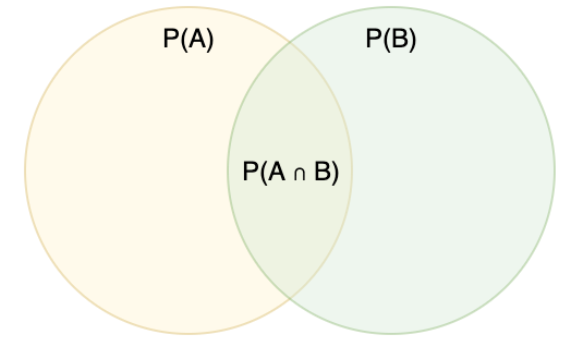

### Productregel

Uit de definitie van voorwaardelijke kans volgt:
- **P(A en B) = P(A|B) . P(B)**
- **P(A en B) = P(B|A) . P(A)**

Merk op dat P(A en B) = P(B en A)

Dit kan je voorstellen adhv een "probability tree":

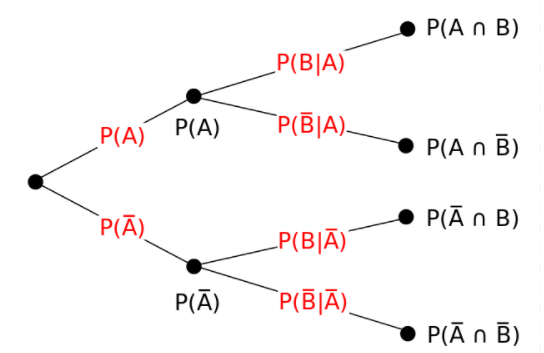

Voorbeeld:
- groep van 100 kinderen
  - 40 meisjes
  - 60 jongens
  - 23 dragen een bril
  - 77 dragen geen bril
- relatieve frequenties -> kansen
  - P(meisje) = 40/100 = 0.4
  - P(jongen) = 60/100 = 0.6
  - P(bril) = 23/100 = 0.23
  - P(geen bril) = 77/100 = 0.77
- van alle meisjes dragen er 8 een bril:
  - P(bril | meisje) = 8/40 = 0.2
  - P(geen bril | meisje) = 32/40 = 0.8
- hieruit volgt dat 15 jongens een bril dragen:
  - P(bril | jongen) = 15/60 = 0.25
  - P(geen bril | jongen) = 45/60 = 0.75
- kans op meisje én bril en kans op meisje én geen bril?
  - P(bril en meisje) = P(bril | meisje) . P(meisje) = 0.2 * 0.4 = 0.08
  - P(geen bril en meisje) = P(geen bril | meisje) . P(meisje) = 0.8 * 0.4 = 0.32
- kans op jongen én bril en kans op jongen én geen bril?
  - P(bril en jongen) = P(bril | jongen) . P(jongen) = 0.25 * 0.6 = 0.15
  - P(geen bril en jongen) = P(geen bril | jongen) . P(jongen) = 0.75 * 0.6 = 0.45


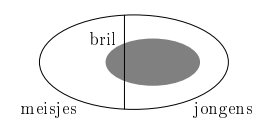

Boomstructuur:
- P(meisje) = 0.4
  - P(bril | meisje) = 0.2
    - P(bril en meisje) = 0.4 * 0.2 = 0.08
  - P(geen bril | meisje) = 0.8
    - P(geen bril en meisje) = 0.4 * 0.8 = 0.32
- P(jongen) = 0.6
  - P(bril | jongen) = 0.25
    - P(bril en jongen) = 0.6 * 0.25 = 0.15
  - P(geen bril | jongen) = 0.75
    - P(geen bril en jongen) = 0.6 * 0.75 = 0.45

### Onafhankelijke gebeurtenissen

- Gebeurtenissen A en B zijn onafhankelijk als ze geen invloed op elkaar hebben

> P(A|B) = P(A) en P(B|A) = P(B)

- Hieruit volgt:

> **P(A en B) = P(A) . P(B)**

Voorbeeld:
- groep van 100 kinderen
  - 40 meisjes
  - 60 jongens
  - 20 dragen een bril
  - 80 dragen geen bril
- relatieve frequenties -> kansen
  - P(meisje) = 40/100 = 0.4
  - P(jongen) = 60/100 = 0.6
  - P(bril) = 20/100 = 0.2
  - P(geen bril) = 80/100 = 0.8
- van alle meisjes dragen er 8 een bril:
  - P(bril | meisje) = 8/40 = 0.2
  - P(geen bril | meisje) = 32/40 = 0.8
- hieruit volgt dat 12 jongens een bril dragen:
  - P(bril | jongen) = 12/60 = 0.2
  - P(geen bril | jongen) = 45/60 = 0.8
- We zien dus dat de kans op bril gelijk is bij jongens en meisjes
  - al dan niet bril dragen is onafhankelijk van meisje of jongen zijn!
  - P(bril) = P(bril | meisje) = P(bril | jongen) = 0.2
  - P(geen bril) = P(geen bril | meisje) = P(geen bril | jongen) = 0.8
- kans op meisje én bril en kans op meisje én geen bril?
  - P(bril en meisje) = P(bril) . P(meisje) = 0.2 * 0.4 = 0.08
  - P(geen bril en meisje) = P(geen bril) . P(meisje) = 0.8 * 0.4 = 0.32
- kans op jongen én bril en kans op jongen én geen bril?
  - P(bril en jongen) = P(bril) . P(jongen) = 0.2 * 0.6 = 0.12
  - P(geen bril en jongen) = P(geen bril) . P(jongen) = 0.8 * 0.6 = 0.48

### Somregel

kans op gebeurtenis A of gebeurtenis B is de kans op A plus de kans op B min de kans op A en B:

> **P(A of B) = P(A) + P(B) - P(A en B)**

Merk op dat P(A of B) = P(B of A)

A of B wordt ook soms weergegeven als de unie van A en B:

> $P(A \cup B) = P(A) + P(B) - P(A \cap B)$


*P(A en B)* moet je aftrekken omdat je anders de doorsnede van A en B twee keer meetelt:
- P(A) = P(A zonder B) + *P(A en B)*
- P(B) = P(B zonder A) + *P(A en B)*
- P(A) + P(B) =  P(A zonder B) + *P(A en B)* + P(B zonder A) + *P(A en B)*

Dus:
- P(A of B) = P(A zonder B) + *P(A en B)* + P(B zonder A) = P(A) + P(B) - *P(A en B)*

Opmerking: "A zonder B" of "A verschil B" wordt in de verzamelingenleer weergegeven als "A \ B".

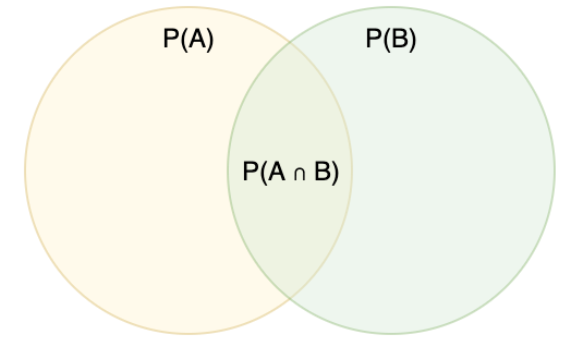

Voorbeeld:
- groep van 100 kinderen
  - 40 meisjes
  - 23 dragen een bril
- relatieve frequenties -> kansen
  - P(meisje) = 40/100 = 0.4
  - P(bril) = 23/100 = 0.23
- van alle meisjes dragen er 8 een bril:
  - P(bril | meisje) = 8/40 = 0.2
- kans op meisje én bril:
  - P(bril en meisje) = P(bril | meisje) . P(meisje) = 0.2 * 0.4 = 0.08
- kans op meisje *of* bril?
  - P(meisje of bril) = P(meisje) + P(bril) - P(meisje en bril) = 0.4 + 0.23 - 0.08 = 0.55

Als A en B **disjunct** zijn
- d.w.z als ze elkaar uitsluiten
- dus als er geen overlap is tussen A en B
- waardoor de doorsnede van A en B leeg is
- dan is P(A of B) = P(A) + P(B)

Voorbeeld:
- zak met 30 rode knikkers, 20 groene knikkers en 50 gele knikkers
  - P(rood) = 30/100 = 0.3
  - P(groen) = 20/100 = 0.2
  - P(geel) = 50/100 = 0.5
- knikker die je trekt kan niet tegelijkertijd rood en groen en geel zijn
  - disjuncte gebeurtenissen
  - P(rood of groen) = P(rood) + P(groen) = 0.3 + 0.2 = 0.5

### Wet van de totale kans

Combinatie van som- en productregel:
> **P(A) = P(A | B) . P(B) + P(A | niet B) . P(niet B)**

Bewijs:
- P(A | B) . P(B) = P(A en B)
- P(A | niet B) . P(niet B) = P(A en niet B) = P(A zonder B)
- P(A en B) + P(A zonder B) = P((A en B) of (A zonder B)) = P(A)

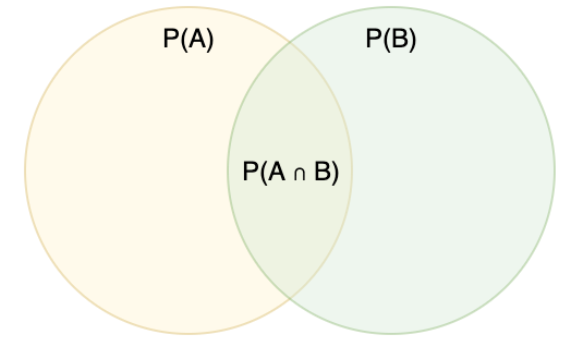

### Theorema van Bayes

Uit P(A en B) = P(B|A) . P(A) = P(A|B) . P(B) volgt:

> **P(B|A) = P(A|B) . P(B) / P(A)**

Toepassen van de wet van de totale kans op P(A) in de noemer:

> **P(B|A) = P(A|B) . P(B) / [P(A|B) . P(B) + P(A | niet B) . P(niet B)]**

De formule mooier voorgesteld m.b.v. LaTeX:

> $P(B|A) = \frac{P(A|B) . P(B)}{P(A|B) . P(B) + P(A|\overline B) . P(\overline B)}$

Kan ook als volgt geschreven worden:

> P(B|A) = P(A en B) / [P(A en B) + P(A en niet B)]

Voorbeeld:
- Je vriend(in) heeft een positieve Corona test afgelegd
- De nauwkeurigheid van de test is 99%
- Op het moment dat de test werd afgenomen waren 1 op 10 000 mensen besmet met COVID
- Wat is de kans dat jouw vriend(in) effectief besmet is met Corona?

Regel van Bayes toepassen:
- P(positief | ziek) = 99/100 = 0.99
- P(positief | niet ziek) = 1/100 = 0.01
- P(ziek) = 1/10000 = 0.0001
- P(niet ziek) = 9999/10000 = 0.9999
- P(positief | ziek) . P(ziek) = P(positief en ziek) = 0.99 * 0.0001
- P(positief | niet ziek) . P(niet ziek) = P(positief en niet ziek) = 0.01 * 0.9999

In [ ]:
teller = 0.99 * 0.0001
noemer = teller + 0.01 * 0.9999
print("P(ziek | positief) = ", teller / noemer)

P(ziek | positief) =  0.00980392156862745


Voorgesteld door probabiliteitsboom (voor 1 000 000 patiënten):

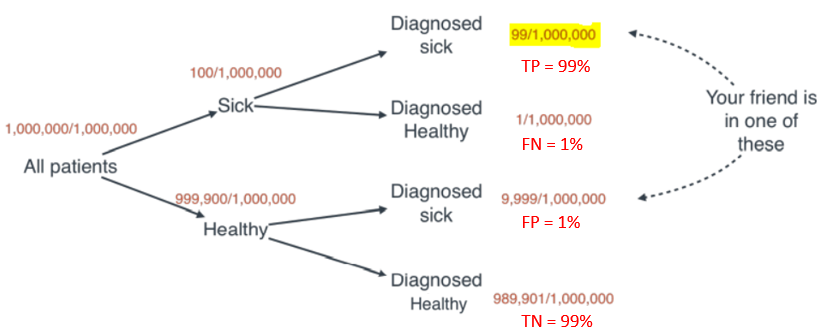

In [ ]:
print("P(ziek | positief) = ", 99 / (99 + 9999))

P(ziek | positief) =  0.00980392156862745


Theorema van Bayes in woorden:

- **Prior**: de kans die we initieel berekenen, nl. de kans dat een patiënt besmet is.
- **Event**: iets dat ons de mogelijkheid geeft betere kansen te berekenen, nl. een positieve test.
- **Posterior**: de "verbeterde" kans die we berekenen adhv de prior en het event, nl. de voorwaardelijke kans dat de patiënt besmet als die positief test.

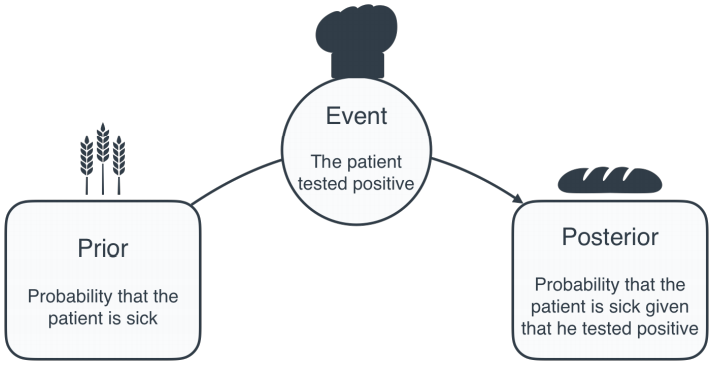

Het theorema van Bayes is zeer belangrijk in statistiek en machine learning. Verschillende subdisciplines zijn ernaar vernoemd, bv. Bayesian statistics, Bayesian analysis en Bayesian learning. In de volgende paragraaf bespreken we de Naive Bayes classifiers.

## **2. Naive Bayes**

### Intro

Naive Bayes classifiers zijn classificatie-algoritmes die gebaseerd zijn op het theorema van Bayes. We illustreren dit adhv de spamfilter use case. Maar alvorens we enkele voorbeeldjes implementeren, leggen we eerst uit wat Naive Bayes classifiers zijn en situeren we het gebruik ervan binnen NLP.

#### Natural Language processing

**Programmeertalen** (bv. Assembler, Python, XML, Lisp): eerst worden de regels bedacht, daarna worden ze toegepast.

**Natuurlijke talen** (bv. Nederlands, Engels): regels werden nadien afgeleid (= linguïstiek of taalkunde).

**Natural Language Processing** (NLP): *Using machine learning and large datasets to
give computers the ability not to understand language, but
to ingest a piece of language as input and return something useful, like predicting the
following:*

- “What’s the topic of this text?” (**text classification**)
- “Does this text contain abuse?” (**content filtering**)
- “Does this text sound positive or negative?” (**sentiment analysis**)
- “What should be the next word in this incomplete sentence?” (**language modeling**)
- “How would you say this in German?” (**translation**)
- “How would you summarize this article in one paragraph?” (**summarization**)
- etc.

**Kort historisch overzicht**

- Tot de jaren negentig was NLP gebaseerd op linguïstische regels.

  - Bijv. [ELIZA](https://en.wikipedia.org/wiki/ELIZA), de chatbot uit de jaren '60 die gebruik maakte van 'pattern matching'.  

- Vanaf de late jaren '80: shallow learning

  - Eerst decision trees voor het afleiden van if/then/else regels
  - Daarna statistische toepassingen zoals logistic regression of *naive Bayes*





- Vanaf 2014-2015: deep learning!

  - Eerst RNNs, vooral bidirectional LSTM
  - Vanaf 2017-2018: Transformers! Bv. BERT, GPT en LaMDA (= Large Language Models)

**Woordvolgorde**

Er zijn twee soorten modellen voor het verwerken van tekst:

- **Sequence models**: Deze modellen respecteren de *woordvolgorde gerespecteerd*, en worden vooral gebruikt bij deep learning. Recurrente neurale netwerken (RNNs) hanteren een strikte woordvolgorde, transformers zijn hierin minder strikt.
- **Bag-of-words models**: Deze modellen houden *geen* rekening met de *woordvolgorde*, en worden vooral gebruikt bij shallow learning, zoals *Naive Bayes*.

#### Naive Bayes classifiers

**Wat?**

- lineaire classifiers
- gebaseerd op het theorema van Bayes
- "naïeve" veronderstelling dat features onafhankelijk zijn van elkaar
- toch effectief en efficiënt, zeker bij relatief kleine datasets
- verschillende algoritmes: afhankelijk van de features moeten kansen anders berekend worden (zie verder)
- toegepast bij ziektediagnoses, classificatie van RNA sequenties, spam filters, ...

**Use case: spamfilter**

- Woorden in mails tellen
- Relatieve frequenties van mails en woorden interpreteren als kansen
- Regel van Bayes:
  - `P(spam | woorden) = P(woorden | spam) * P(spam) / P(woorden)`
- Wet van totale kans:
  - `P(woorden) = P(woorden | spam) * P(spam) + P(woorden | ham) * P(ham)`
- Productregel onder "Naïeve" veronderstelling van onafhankelijkheid:
  - `P(woorden | spam) = P(woord1 | spam) * P(woord2 | spam) * ... * P(woordn | spam)`
  - `P(woorden | ham) = P(woord1 | ham) * P(woord2 | ham) * ... * P(woordn | ham)`
- Classificatie: als `P(spam | woorden) > 0.5`, dan is de mail `spam`, anders `ham`


### Voorbeeld 1: "lottery"


- 100 mails waarvan
  - 80 ham
  - 20 spam
- woord "lottery" komt voor in
  - 5 ham mails
  - 15 spam mails
- wat is de kans dat een mail spam is als het "lottery" bevat?

In [ ]:
# aantallen
n_mails = 100
n_ham = 80
n_spam = 20
n_lottery_spam = 15
n_lottery_ham = 5

# P(spam) = #spam / #mails
P_spam = n_spam / n_mails

# P(ham) = #ham / #mails
P_ham = n_ham / n_mails

# P(lottery) = #lottery / #mails
P_lottery = (n_lottery_spam + n_lottery_ham) / n_mails

# P(lottery | spam) = #lottery / #spam
P_lottery_spam = n_lottery_spam / n_spam

# P(lottery | ham) = #lottery / #ham
P_lottery_ham = n_lottery_ham / n_ham

# regel van Bayes toepassen
print("P(spam | lottery) =", P_lottery_spam * P_spam / P_lottery)

P(spam | lottery) = 0.7500000000000001


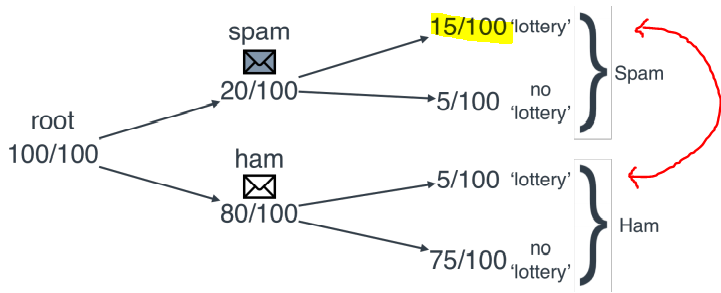

In [ ]:
# aflezen van de boom: P(lottery en spam) / P(lottery)
print("P(spam | lottery) =", n_lottery_spam / (n_lottery_spam + n_lottery_ham))

P(spam | lottery) = 0.75


### Voorbeeld 2: "sales"

- 100 mails waarvan
  - 80 ham
  - 20 spam
- woord "sales" komt voor in
  - 4 ham mails
  - 6 spam mails
- wat is de kans dat een mail spam is als het "sales" bevat?

In [ ]:
# aantallen
n_sales_spam = 6
n_sales_ham = 4

# P(sales) = #sales / #mails
P_sales = (n_sales_spam + n_sales_ham) / n_mails

# P(sales | spam) = #sales in spam / #spam
P_sales_spam = n_sales_spam / n_spam

# P(sales | ham) = #sales in ham / #ham
P_sales_ham = n_sales_ham / n_ham

# regel van Bayes toepassen
print("P(spam | sales) =", P_sales_spam * P_spam / P_sales)

P(spam | sales) = 0.6


In [ ]:
# of sneller: P(sales en spam) / P(sales)
print("P(spam | sales) =", n_sales_spam / (n_sales_spam + n_sales_ham))

P(spam | sales) = 0.6


### Voorbeeld 3: "lottery" én "sales"

- Regel van Bayes toepassen:
  - `P(spam | lottery en sales) = P(lottery en sales | spam) * P(spam) / P(lottery en sales)`
- Noemer berekenen mbv de wet van de totale kans:
  - `P(lottery en sales) = P(lottery en sales | spam) * P(spam) + P(lottery en sales | ham) * P(ham)`
- Productregel toepassen onder de "naïeve" veronderstelling van onafhankelijkheid:
  - `P(lottery en sales | spam) = P(lottery | spam) * P(sales | spam)`
  - `P(lottery en sales | ham) = P(lottery | ham) * P(sales | ham)`
  - zo hoeven we niet te weten hoeveel mails effectief "lottery" en "sales" bevatten
  - maakt de berekening veel eenvoudiger
  - Let op! Is ok voor classificatie, maar niet om kansen in te schatten




In [ ]:
# productregel toepassen
P_woorden_spam = P_lottery_spam * P_sales_spam
P_woorden_ham = P_lottery_ham * P_sales_ham
P_woorden = P_woorden_spam * P_spam + P_woorden_ham * P_ham

# regel van Bayes toepassen
print("P(spam | lottery en sales) =", P_woorden_spam * P_spam / P_woorden)

P(spam | lottery en sales) = 0.9473684210526315


Efficiënter coderen: werken met dictioniaries!

In [ ]:
numbers = dict(total=n_mails, ham=n_ham, spam=n_spam)  # aantal mails, aantal ham en aantal spam
frequencies = dict(
    lottery=dict(ham=n_lottery_ham, spam=n_lottery_spam),  # aantal lottery in ham en spam
    sales=dict(ham=n_sales_ham, spam=n_sales_spam)  # aantal sales in ham en spam
)

En functie definiëren:

In [ ]:
def naive_bayes(numbers, frequencies):

    P_words = dict(ham=1, spam=1)  # P(woord|label) initialiseren
    for word in frequencies:
        for label in ['ham', 'spam']:  # vermenigvuldigen met P(woord|label)
            P_words[label] *= frequencies[word][label] / numbers[label]
    for label in ['ham', 'spam']:  # vermenigvuldigen met P(label)
        P_words[label] *= numbers[label] / numbers['total']
    return P_words['spam'] / (P_words['spam'] + P_words['ham'])  # Bayes toepassen

In [ ]:
naive_bayes(numbers, frequencies)

0.9473684210526315

### Voorbeeld 4: meerdere woorden

Klasse `SpamFilter` definiëren die de werkwijze uit voorbeeld 3 generiek implementeert:
- attributen:
  - `messages`: dataframe met kolommen `"words"` en `"spam"` (zie voorbeeld)
  - `alpha`: hyperparameter voor Laplace of Lidstone smoothing (zie verder)
  - `_numbers`: dictionary met aantallen
  - `_frequencies`: dictionary met frequenties
  - `_labels`: list met naam van de labels: `'ham'` en `'spam'`
  - `_ndim`: aantal features = aantal woorden
- methoden:
  - `train`: bepaalt de aantallen en de frequenties
  - `__get_numbers`: bepaalt de aantallen
  - `__get_frequencies`: bepaalt de frequenties
  - `predict`: retourneert de kans dat input `message` spam is

In [ ]:
class SpamFilter:

    def __init__(self, messages, alpha=1.0):
        self.messages = messages
        self.alpha = alpha
        self._numbers = {}
        self._frequencies = {}
        self._labels = ['ham', 'spam']
        self._ndim = None

    def train(self):
        self.__get_numbers()
        self.__get_frequencies()

    def __get_numbers(self):
        n_total = len(self.messages)
        n_spam = self.messages.spam.sum()
        self._numbers = dict(
            total=n_total,
            spam=n_spam,
            ham=n_total - n_spam
        )

    def __get_frequencies(self):
        self._frequencies = {}
        for _, row in self.messages.iterrows():
            for word in row['words']:
                if word not in self._frequencies:
                    self._frequencies[word] = {'ham': self.alpha, 'spam': self.alpha}
                if row["spam"] == 1:
                    self._frequencies[word]["spam"] += 1
                else:
                    self._frequencies[word]["ham"] += 1
        self._ndim = len(self._frequencies)

    def predict(self, message):
        words = message.split()
        P_words = dict(ham=1, spam=1)
        for word in words:
            if word in self._frequencies:
                for label in self._labels:
                    P_words[label] *= self._frequencies[word][label] / (self._numbers[label] + self.alpha * self._ndim)
        for label in self._labels:
            P_words[label] *= self._numbers[label] / self._numbers['total']
        return P_words['spam'] / (P_words['spam'] + P_words['ham'])

**Uitleg smoothing**:
- oplossing voor woorden die niet voorkomen in spam en/of ham mails
- als een woord niet voorkomt, dan is de frequentie en de conditionele kans gelijk aan 0
  - `n_woord = 0`
  - frequentie `f_woord = n_woord / n_label = 0`
  - kans `P(woord | label) = 0`
  - met label gelijk aan spam of ham
  - en `n_label` het aantal spam of ham mails
- smoothen met `alpha`:
  - `f = (n_woord + alpha) / (n_label + alpha * n)`
  - met `n` het aantal features
  - mogelijke waarden voor `alpha`:
    - `alpha = 0`: geen smoothing
    - `0 < alpha < 1`: Lidstone smoothing
    - `alpha = 1`: Laplace smoothing

File "berichten.txt" inlezen:

In [ ]:
with open("berichten.txt", "r") as f:
    berichten = f.read().splitlines()
berichten = [bericht.split(": ") for bericht in berichten]
berichten

[['ham', ' ga je morgen voetballen'],
 ['ham', ' straks terrasje doen'],
 ['ham', ' klaar met studeren'],
 ['spam', 'één miljoen gewonnen met de loterij'],
 ['spam', 'vergroot je bedprestaties met viagra'],
 ['spam', 'kim wil je ontmoeten']]

Omzetten naar Pandas dataframe:

In [ ]:
import pandas as pd

berichten = pd.DataFrame(berichten, columns=["label", "text"])
berichten["text"] = berichten["text"].str.strip()
berichten["words"] = berichten["text"].apply(lambda txt: set(txt.split()))
berichten["spam"] = (berichten["label"] == "spam").astype(int)
berichten

,label,text,words,spam
0,ham,ga je morgen voetballen,"{voetballen, morgen, ga, je}",0
1,ham,straks terrasje doen,"{terrasje, doen, straks}",0
2,ham,klaar met studeren,"{met, studeren, klaar}",0
3,spam,één miljoen gewonnen met de loterij,"{miljoen, met, de, één, loterij, gewonnen}",1
4,spam,vergroot je bedprestaties met viagra,"{bedprestaties, vergroot, je, viagra, met}",1
5,spam,kim wil je ontmoeten,"{ontmoeten, wil, kim, je}",1


`SpamFilter` toepassen met `alpha=0.0`:

In [ ]:
spam_filter = SpamFilter(berichten, alpha=0.0)
spam_filter.train()

for sms in ["studeren", "viagra", "ok", "voetballen met viagra"]:
    print(f"{sms}: {spam_filter.predict(sms):.2f}")

studeren: 0.00
viagra: 1.00
ok: 0.50
voetballen met viagra: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


Laatste sms geeft `NaN` als resultaat door `0 / 0`.

Hyperparameters aanpassen naar `alpha=1.0` en opnieuw trainen:

In [ ]:
spam_filter.alpha = 1.0
spam_filter.train()
for sms in ["studeren", "viagra", "ok", "voetballen met viagra"]:
    print(f"{sms}: {spam_filter.predict(sms):.2f}")

studeren: 0.33
viagra: 0.67
ok: 0.50
voetballen met viagra: 0.60


Merk op dat `'ok'` een kans retourneert van 0.50. Waarom? Het woord komt niet voor, maar we initialiseren `P(woord|label)` als 1, waardoor `P(woord|label) * P(label)` gelijk is aan `P(label)`. Omdat er hier evenveel spam als ham berichten zijn, krijgen we 0.50.

### Voorbeeld 5: échte dataset met e-mails

File "emails.csv" inlezen:

In [ ]:
import pandas as pd

emails = pd.read_csv("emails.csv")
emails['words'] = emails['text'].apply(lambda txt: set(txt.lower().split()))  # kolom "words" toevoegen
emails

,text,spam,words
0,Subject: naturally irresistible your corporate...,1,"{stylish, break, affordability, all, much, ,, ..."
1,Subject: the stock trading gunslinger fanny i...,1,"{esmark, deoxyribonucleic, boar, attire, super..."
2,Subject: unbelievable new homes made easy im ...,1,"{rate, credit, homes, extended, factor, time, ..."
3,Subject: 4 color printing special request add...,1,"{fax, e, &, mail, advertisement, 626, ,, here,..."
4,"Subject: do not have money , get software cds ...",1,"{marriage, all, ?, cds, ,, ended, here, me, be..."
...,...,...,...
5723,Subject: re : research and development charges...,0,"{reviewing, if, cc, ,, occurred, shall, here, ..."
5724,"Subject: re : receipts from visit jim , than...",0,"{fax, archive, all, cc, ,, page, 388, pm, kami..."
5725,Subject: re : enron case study update wow ! a...,0,"{fax, 5, if, all, office, much, ,, cc, one, me..."
5726,"Subject: re : interest david , please , call...",0,"{5, cc, ,, quantitative, extension, pm, 18, it..."


`SpamFilter` toepassen:

In [ ]:
spam_filter = SpamFilter(emails)
spam_filter.train()

In [ ]:
new_mails = ['hi mom how are you',
             'meet me at the lobby of the hotel at nine am',
             'buy cheap lottery easy money now']
for mail in new_mails:
    print(f"{mail}: {spam_filter.predict(mail):.4f}")

hi mom how are you: 0.0006
meet me at the lobby of the hotel at nine am: 0.0000
buy cheap lottery easy money now: 0.9825


### Scikit-Learn

Module `sklearn.naive_bayes` bevat 2 klassen die kunnen toegepast worden bij tekstclassificatie:
- Multivariate Bernoulli Naive Bayes:
  - klasse `BernoulliNB`
  - features geven weer of een woord voorkomt of niet (0 of 1)
- Multinomial Naive Bayes:
  - klasse `MultinomialNB`
  - features geven weer hoeveel keer een woord voorkomt

Module `sklearn.naive_bayes` bevat nog andere klassen die varianten van Naive Bayes implementeren.

#### Feature extraction

We passen het **bag of words** model uit Natural Language Processing (NLP) toe:
- stap 1: **vocabulary** opstellen: tekst opsplitsen in woorden en de woorden tellen
- stap 2: **vectorization**: matrix `X` met features opstellen
  - elke example (rij) is een tekstdocument
  - elke feature (kolom) is een woord uit de vocabulary
  - *Multinomiaal*: elk element geeft aan hoeveel keer het woord voorkomt in het tekstdocument
  - *Bernoulli*: elk element geeft aan of het woord voorkomt in het tekstdocument of niet

Het opsplitsen van tekst in woorden (of tokens) noemt men **tokenization**. Maar eerst moet de tekst **gestandaardiseerd** worden:
- leestekens verwijderen
- stopwoorden verwijderen, dit zijn woorden zonder relevante betekenis zoals and, or, the, ...
- woorden terugbrengen tot hun stam of lemma dmv "stemming" en "lemmatization", bv plays -> play, .
- ...

Na het standaardiseren van de tekst, wordt die opgesplitst in **tokens** (= tokenization):

- **Word-level tokenization**: opsplitsen obv spaties en leestekens zodat de woorden afgezonderd worden. Soms worden woorden ook nog gesplitst, bijv. `'called'` wordt dan `'call'` + `'ed'`.
- **N-gram tokenization**: men neemt N woorden als token, bijv. bigram of 2-gram tokens bestaan uit 2 woorden.
- **Character-level tokenization**: de tokens zijn hier de individuele karakters van de tekst. Wordt niet zo vaak gebruikt, tenzij bij speech recognition of text generation.

Eenvoudig voorbeeld:

In [ ]:
# 2 tekstdocumenten
documents = ["each state has its own laws",
             "every country has its own laws and its own culture"]

# bag of words
bag_of_words = {}
for doc in documents:
    for word in doc.split():
        if word in bag_of_words:
            bag_of_words[word] += 1
        else:
            bag_of_words[word] = 1
bag_of_words

{'and': 1,
 'country': 1,
 'culture': 1,
 'each': 1,
 'every': 1,
 'has': 2,
 'its': 3,
 'laws': 2,
 'own': 3,
 'state': 1}

In [ ]:
# feature matrix X
import pandas as pd
import numpy as np


words = list(bag_of_words.keys())
X = np.zeros((len(documents), len(words)), dtype=int)
for irow in range(X.shape[0]):
    for icol in range(X.shape[1]):
        X[irow, icol] = documents[irow].count(words[icol])

DTM = pd.DataFrame(X, index=documents, columns=words)
DTM

,each,state,has,its,own,laws,every,country,and,culture
each state has its own laws,1,1,1,1,1,1,0,0,0,0
every country has its own laws and its own culture,0,0,1,2,2,1,1,1,1,1


De matrix `X` wordt ook **document-term matrix** (DTM) genoemd. Deze is klaar voor gebruik door `MultinomialNB`.

Voor `BernoulliNB` moeten we `X` omzetten naar een binaire matrix met nullen en enen:

In [ ]:
X = X.astype(bool).astype(int)
X

array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

**Scikit-Learn** heeft in de module `feature_extraction.text` een klasse `CountVectorizer` waarmee we de feature matrix `X` kunnen creëren:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
v = CountVectorizer()
v.fit(documents)
X = v.transform(documents)
X  # sparse matrix

<2x10 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

**X** is in dit geval een **sparse** matrix. Dit is een matrix die heel veel nullen bevat die in principe niet hoeven opgeslagen te worden. Er zijn verschillende datatypes in Python voor sparse matrices die de niet-nul elementen op een efficiënte manier opslaan.

De `sparse` matrix X kan je omzetten naar een "full" matrix met methode `toarray()`:

In [ ]:
X.toarray()  # sparse matrix omzetten naar full matrix

array([[0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 2, 1, 2, 0]])

Wil je de kolomnamen weten, dan roep je methode get_feature_names() aan van het `CountVectorizer` object:

In [ ]:
v.get_feature_names()  # get_feature_names_out() in new version

['and',
 'country',
 'culture',
 'each',
 'every',
 'has',
 'its',
 'laws',
 'own',
 'state']

Er zijn verschillende attributen die de tokenization bepalen. Zo vind je een reguliere expressie terug in `token_pattern`:

In [ ]:
v.token_pattern

'(?u)\\b\\w\\w+\\b'

Met deze reguliere expressie wordt een token gedefinieerd als bestaande uit minimum 2 alfanumerieke karakters waarbij leestekens genegeerd worden:

In [ ]:
import re
txt = "News : aurora 5 . 2 update aurora"
re.findall(r"(?u)\b\w\w+\b", txt)

['News', 'aurora', 'update', 'aurora']

De `split()` methode die wij toepassen is minder streng:

In [ ]:
txt.split()

['News', ':', 'aurora', '5', '.', '2', 'update', 'aurora']

Dit komt overeen met de reguliere expressie `"\S+"`. Merk op dat we die expressies als "raw strings" moeten opgeven, dus voorafgegaan met een "r".

In [ ]:
re.findall(r"\S+", txt)

['News', ':', 'aurora', '5', '.', '2', 'update', 'aurora']

Laten we nu eens de dataset met e-mails vectoriseren:

In [ ]:
import pandas as pd
emails = pd.read_csv("emails.csv")
c = CountVectorizer()
c.fit(emails.text.values)
X = c.transform(emails.text.values)  # DTM
y = emails.spam.values  # labels

Eens we feature matrix `X` hebben en vector `y` met de labels, dan trainen we de Naive Bayes modellen in Scikit-Learn net als elk ander machine learning model.

#### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(X, y)
mnb.score(X, y)

0.9958100558659218

De nieuwe mails moeten we natuurlijk op dezelfde manier transformeren:

In [ ]:
new_mails = ['hi mom how are you',
             'meet me at the lobby of the hotel at nine am',
             'buy cheap lottery easy money now']
Xnew = c.transform(new_mails)
mnb.predict(Xnew)

array([0, 0, 1])

De eerste twee mails worden als ham gezien, de laatste als spam. En dat is correct.

Hoewel de voorspelde kansen bij Naive Bayes niet correct zijn, kunnen we ze toch opvragen:

In [ ]:
mnb.predict_proba(Xnew)

array([[6.91578226e-01, 3.08421774e-01],
       [9.99968010e-01, 3.19902894e-05],
       [2.15388278e-06, 9.99997846e-01]])

De eerste kolom is de kans op ham, de twee de kans op spam.

#### Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb = BernoulliNB()
bnb.fit(X, y)
bnb.score(X, y)

0.9924930167597765

In [ ]:
bnb.predict(Xnew)

array([1, 0, 1])

In [ ]:
bnb.predict_proba(Xnew)

array([[2.98512248e-03, 9.97014878e-01],
       [9.81683228e-01, 1.83167716e-02],
       [3.65119901e-09, 9.99999996e-01]])

Hier wordt de eerste mail verkeerd geclassificeerd.

Bij tekstclassificatie geeft Multinomiale Naive Bayes over het algemeen betere resultaten dan Bernoulli, maar veel hangt natuurlijk ook af van hoe de tokenization is gebeurd.

---
---
## **BRONNEN**

* Handboek: Grokking Machine Learning (version 12), Manning Early Access Program, by Luis G. Serrano, 2020.
* Hoofdstuk "Kansen", cursus Data Science II, opleiding professionele bachelor Toegepaste Informatica, Karel de Grote Hogeschool, opgesteld door Kris Demuynck, 2018.
* Deep Learning with Python (2nd Edition), Manning Publications, by François Chollet, 2022.
* https://sebastianraschka.com/Articles/2014_naive_bayes_1.html
* https://nl.wikipedia.org/wiki/Wetten_van_de_grote_aantallen
* https://nl.wikipedia.org/wiki/Complementregel
* https://nl.wikipedia.org/wiki/Voorwaardelijke_kans
* https://en.wikipedia.org/wiki/Multinomial_distribution
* https://en.wikipedia.org/wiki/Document-term_matrix
* https://scikit-learn.org/stable/modules/naive_bayes.html
* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
* https://scikit-learn.org/stable/modules/feature_extraction.html
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* https://laptrinhx.com/how-i-was-using-naive-bayes-incorrectly-till-now-part-1-4260129153/


---